In [1]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator,load_img
from tqdm import tqdm
import tensorflow as tf
import os
from PIL import Image
import numpy as np

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten , Dropout 
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img

In [3]:
Train_data = []
def data_load(Path_data):
  for data in Data_name:
    a = os.path.join(Path_data, data)
    b = os.listdir(a)
    for i in tqdm(b):
      try:
        if i.startswith('cat'):
          d_label = 0
        if i.startswith('dog'):
          d_label = 1
        img_lod = Image.open(os.path.join(Path_data,data, i))
        Resized = img_to_array(img_lod)
        image = tf.image.resize(Resized, (100, 100))
        img = image/255
        Train_data.append([img, d_label])
      except Exception as e:
        print(e)
Data_name = ['cats', 'dogs']
train = data_load(r'C:\Users\Abhay Rohilla\Desktop\archive (3)\training_set\training_set')

100%|█████████████████████████████████████████████████████████████████████████████| 4001/4001 [00:36<00:00, 110.35it/s]


cannot identify image file 'C:\\Users\\Abhay Rohilla\\Desktop\\archive (3)\\training_set\\training_set\\cats\\_DS_Store'


100%|██████████████████████████████████████████████████████████████████████████████| 4006/4006 [00:40<00:00, 99.24it/s]

cannot identify image file 'C:\\Users\\Abhay Rohilla\\Desktop\\archive (3)\\training_set\\training_set\\dogs\\_DS_Store'


In [4]:
Train_data1 = []
def data_load(Path_data):
  for data in Data_name:
    a = os.path.join(Path_data, data)
    b = os.listdir(a)
    for i in tqdm(b):
      try:
        if i.startswith('cat'):
          d_label = 0
        if i.startswith('dog'):
          d_label = 1
        img_lod = Image.open(os.path.join(Path_data,data, i))
        Resized = img_to_array(img_lod)
        image = tf.image.resize(Resized, (100, 100))
        img = image/255
        Train_data1.append([img, d_label])
      except Exception as e:
        print(e)
Data_name = ['cats', 'dogs']
val = data_load(r'C:\Users\Abhay Rohilla\Desktop\archive (3)\test_set\test_set')

100%|██████████████████████████████████████████████████████████████████████████████| 1012/1012 [00:11<00:00, 87.78it/s]


cannot identify image file 'C:\\Users\\Abhay Rohilla\\Desktop\\archive (3)\\test_set\\test_set\\cats\\_DS_Store'


100%|██████████████████████████████████████████████████████████████████████████████| 1013/1013 [00:11<00:00, 84.50it/s]

cannot identify image file 'C:\\Users\\Abhay Rohilla\\Desktop\\archive (3)\\test_set\\test_set\\dogs\\_DS_Store'


In [5]:
import random
random.shuffle(Train_data)
random.shuffle(Train_data1)

In [6]:
Train_data[3009][1]

0

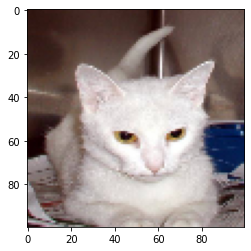

In [7]:
import matplotlib.pyplot as plt
plt.imshow(Train_data[3009][0])

In [8]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in Train_data:
  x_train.append(feature)
  y_train.append(label)

for feature, label in Train_data1:
  x_val.append(feature)
  y_val.append(label)

In [9]:
x_train1 = np.array(x_train)
y_train1 = np.array(y_train)
x_val1 = np.array(x_val)
y_val1 = np.array(y_val)

In [33]:
x_train1[0]

array([[[0.42572552, 0.40611768, 0.31984314],
        [0.40896863, 0.3893608 , 0.30308628],
        [0.40901962, 0.38941178, 0.30313727],
        ...,
        [0.22862744, 0.22862744, 0.18156862],
        [0.22453724, 0.23248234, 0.1775294 ],
        [0.21686274, 0.2254902 , 0.17019609]],

       [[0.4272941 , 0.40768626, 0.32141176],
        [0.41043532, 0.39082748, 0.30455294],
        [0.4027451 , 0.38313726, 0.29686272],
        ...,
        [0.23058824, 0.23058824, 0.18352942],
        [0.23435687, 0.23827843, 0.18337648],
        [0.22666667, 0.23058824, 0.17568628]],

       [[0.43662745, 0.4170196 , 0.33074507],
        [0.41150978, 0.39190194, 0.30562744],
        [0.41068625, 0.3910784 , 0.3048039 ],
        ...,
        [0.24009806, 0.24009806, 0.19303924],
        [0.2394706 , 0.23111764, 0.18039216],
        [0.24649018, 0.23472548, 0.18570587]],

       ...,

       [[0.3287055 , 0.23850942, 0.17576432],
        [0.30741143, 0.21721533, 0.15447022],
        [0.31843224, 0

In [10]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x_train1, y_train1, batch_size=32, epochs = 50, validation_split=0.2, validation_data = (x_val1, y_val1), validation_batch_size=32)

Epoch 1/50
201/201 [==============================] - 268s 1s/step - loss: 0.6086 - accuracy: 0.6766 - val_loss: 0.5805 - val_accuracy: 0.6983
Epoch 2/50
201/201 [==============================] - 264s 1s/step - loss: 0.5812 - accuracy: 0.7038 - val_loss: 0.5511 - val_accuracy: 0.7277
Epoch 3/50
201/201 [==============================] - 257s 1s/step - loss: 0.5495 - accuracy: 0.7306 - val_loss: 0.5689 - val_accuracy: 0.7014
Epoch 4/50
201/201 [==============================] - 263s 1s/step - loss: 0.5037 - accuracy: 0.7616 - val_loss: 0.5328 - val_accuracy: 0.7439
Epoch 5/50
201/201 [==============================] - 263s 1s/step - loss: 0.4756 - accuracy: 0.7726 - val_loss: 0.5048 - val_accuracy: 0.7489
Epoch 6/50
201/201 [==============================] - 264s 1s/step - loss: 0.4478 - accuracy: 0.7942 - val_loss: 0.4611 - val_accuracy: 0.7789
Epoch 7/50
201/201 [==============================] - 263s 1s/step - loss: 0.4117 - accuracy: 0.8178 - val_loss: 0.4743 - val_accuracy: 0.7851

In [22]:
model.evaluate(x_val1,  y_val1, verbose=2)

64/64 - 12s - loss: 0.9903 - accuracy: 0.7973


[0.9902631044387817, 0.7973306775093079]

In [36]:
img_lod = Image.open(r'D:\catjpg2.jpg')
Resized = img_to_array(img_lod)
image = tf.image.resize(Resized, (100, 100))
ri = image/255
img_batch = np.expand_dims(ri, axis=0)
prediction = model.predict(img_batch)

In [37]:
Op = np.round(prediction[0][0])
if 1.0 == Op:
  print("This is dog")
if 0.0 == Op:
  print("This is cat")

This is cat


ValueError: x and y must have same first dimension, but have shapes (10,) and (50,)

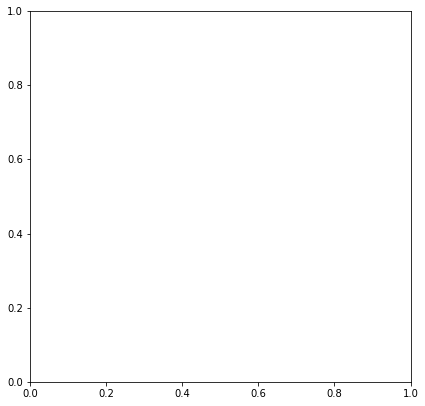

In [31]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()